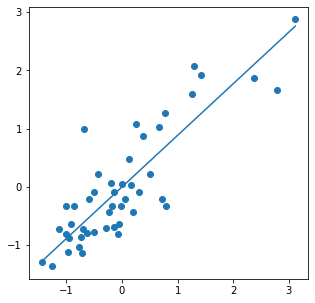

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[101]:
from _lsprof import profiler_entry

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# In[102]:


data = pd.read_csv("2.txt", names = ["Size", "Bedroms", "Price"])
data = (data - data.mean()) / data.std()


# In[103]:


data.insert(0, "Ones", 1)


# In[104]:


cols = data.shape[1]
x = np.matrix(data.iloc[:, 0:cols-1])
y = np.matrix(data.iloc[:, cols-1:cols])
theta = np.matrix(np.ones(x.shape[1]))


# In[105]:


def LossCost(x,y,theta):
    z = np.power((x * theta.T) - y , 2)
    return  np.sum(z) / (2 * len(x))


# In[106]:


LossCost(x,y,theta)


# In[ ]:





# In[107]:


def GradientDescent(x,y,theta,its,alpha):
    temp = np.matrix(theta.copy())
    
    for i in range(its):
        error = (x * theta.T) - y
        for j in range(x.shape[1]):
            term = np.multiply(error, x[:,j])
            temp[0, j] = theta[0, j] - (alpha / x.shape[0]) * np.sum(term)
        theta = temp
    return theta


# In[111]:


theta = np.matrix(np.zeros(x.shape[1]))
theta = GradientDescent(x,y,theta,1000,0.1)


# In[112]:


LossCost(x,y,theta)


# In[ ]:

# print(x)


data2 = pd.read_csv("2.txt", names = ["Size", "Bedroms", "Price"])
data2.insert(0, "Ones", 1)
data2 = (data2 - data2.mean()) / data2.std()

x = np.linspace(data2.Size.min() , data2.Size.max() , 10)
predicted = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, predicted)
ax.scatter(data2.Size, data2.Price)
plt.show()